c:\Users\jhpark\anaconda3\envs\dl\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\jhpark\anaconda3\envs\dl\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\jhpark\anaconda3\envs\dl\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
c:\Users\jhpark\anaconda3\envs\dl\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


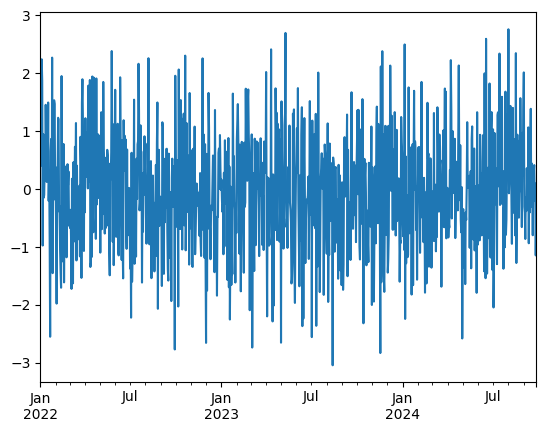

c:\Users\jhpark\anaconda3\envs\dl\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\jhpark\anaconda3\envs\dl\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


예측값: 2024-09-27    0.088134
2024-09-28   -0.015443
2024-09-29    0.115987
2024-09-30    0.035523
2024-10-01    0.078136
2024-10-02    0.038185
2024-10-03    0.070654
2024-10-04    0.041943
2024-10-05    0.066864
2024-10-06    0.045787
Freq: D, Name: predicted_mean, dtype: float64
MSE: 0.9775942131941444


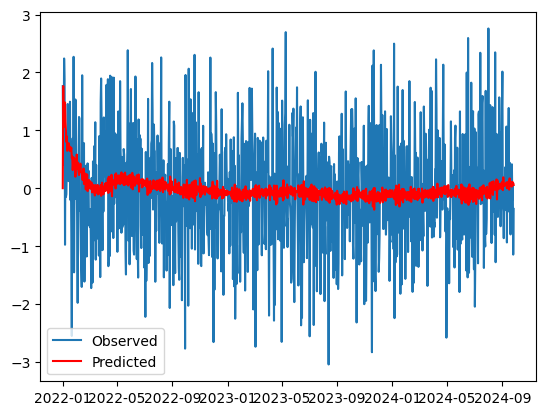

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# 데이터 불러오기 혹은 생성하기
# 예제로 임의의 시계열 데이터를 생성해보겠습니다.
np.random.seed(0)
data = pd.Series(np.random.randn(1000), index=pd.date_range('2022-01-01', periods=1000))

# 시계열 데이터 시각화
data.plot()
plt.show()

# ARIMA 모델 생성 및 학습
# ARIMA(p, d, q)에서 p는 자기회귀 모형의 차수, d는 차분의 차수, q는 이동 평균 모형의 차수입니다.
# p, d, q 값은 사용자가 설정해야 합니다.

# 예를 들어 p=5, d=1, q=2로 설정하겠습니다.
p, d, q = 5, 1, 2
model = ARIMA(data, order=(p, d, q))
fit_model = model.fit()

# 예측값 계산
forecast = fit_model.forecast(steps=10)  # 예측할 스텝 수를 설정합니다. 이 예제에서는 10개의 스텝을 예측합니다.
print("예측값:", forecast)

# 모델 성능 평가
# 만약 테스트 데이터가 있다면 실제값과 비교하여 모델의 성능을 평가할 수 있습니다.
# 이 예제에서는 테스트 데이터가 없으므로 모델의 성능을 시각적으로 평가할 수는 없습니다.

# 모델의 MSE(Mean Squared Error) 계산
# 만약 테스트 데이터가 있다면 테스트 데이터에 대한 MSE를 계산할 수 있습니다.
# 예제로서 테스트 데이터가 없기 때문에 학습 데이터에 대한 MSE를 계산합니다.
train_pred = fit_model.predict(start=0, end=len(data)-1)
mse = mean_squared_error(data, train_pred)
print("MSE:", mse)

# 학습 데이터와 예측값 시각화
plt.plot(data, label='Observed')
plt.plot(train_pred, color='red', label='Predicted')
plt.legend()
plt.show()


In [9]:
fit_model.forecast(steps=len(test_data))

2024-03-11   -0.092860
2024-03-12   -0.106050
2024-03-13   -0.113400
2024-03-14   -0.088355
2024-03-15   -0.144264
                ...   
2024-09-22   -0.129675
2024-09-23   -0.129675
2024-09-24   -0.129675
2024-09-25   -0.129675
2024-09-26   -0.129675
Freq: D, Name: predicted_mean, Length: 200, dtype: float64

c:\Users\jhpark\anaconda3\envs\dl\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


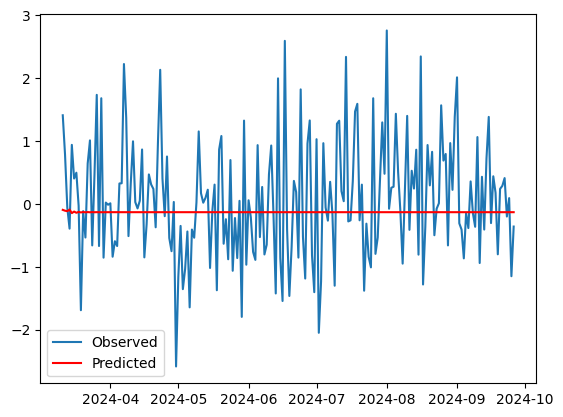

테스트 데이터에 대한 MSE: 0.9220183252224555


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# 데이터 생성
np.random.seed(0)
data = pd.Series(np.random.randn(1000), index=pd.date_range('2022-01-01', periods=1000))

# 학습 데이터와 테스트 데이터로 분리
train_data = data[:800]
test_data = data[800:]

# ARIMA 모델 생성 및 학습
p, d, q = 5, 1, 2
model = ARIMA(train_data, order=(p, d, q))
fit_model = model.fit()

# 테스트 데이터에 대한 예측
forecast= fit_model.forecast(steps=len(test_data),alpha=0.05)

# 예측값 시각화
plt.plot(test_data, label='Observed')
plt.plot(test_data.index, forecast, color='red', label='Predicted')
# plt.fill_between(test_data.index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.show()

# 모델 성능 평가
mse = mean_squared_error(test_data, forecast)
print("테스트 데이터에 대한 MSE:", mse)
